
# <u>**The Academic Lifestyle: Exploring the Balance**</u>

<span style = "color:83898b"> *How High-Achieving Students Manage Stress, Study, Social Life, Sleep and Physical Activity*</span>

By: **Brandon Viaje** (**100912514**)



## 	**Introduction** 

![Education](Learning-cuate.png)
###### **Image Source: <a href="https://storyset.com/education"> Education illustrations by Storyset </a>** [1]

What sets apart the top-performing students from the rest? Is it the number of hours spent studying, a healthy lifestyle, or effective time management? Many students, including myself, hope to discover the formula for academic success. This analysis uses a dataset from Kaggle. This dataset includes information for students GPA, stress levels, and daily hours spent on various activities (studying, sleeping, extracurricular, social, and physical exercise). 

In this assignment, I will explore the relationship between how student stress levels affect their grades. How is academic performance linked to a student's stress level? Does it help them perform or hinder them? Another question that will be explored for this assignment is how students' daily activities correlate to their stress levels. Does having more hours for certain activities determine a person's well being?

I will answer these questions through a data science lens. For this assignment, I will use Python's library involving data collection, cleaning, manipulation and exploratory analysis. Finally, I'll summarize the relationships I find between stress levels, GPA and daily activities. Next, I will discuss potential suggestions from these relationships. My goal is to provide useful analyses for students who want to improve their academic performance, while also keeping a good balance between their studies and personal life. 

## <u>Methods</u>

### *Data Collection*

I will start by importing my dataset into my environment in order to manipulate and analyze data.

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

In [96]:
#Load Data [2]
studentData = pd.read_csv('student_lifestyle_dataset.csv')

### *Data Cleaning*

To improve clarity and readability, I will rename the columns to shorter, more meaningful names and round the numeric values to two decimal places.

In [97]:
#Change Formatting/ Round Values

pd.set_option('display.precision',2)

#Tidy up names
studentData.columns = ["ID", "Study", "Extracurricular", "Sleep", "Social", "Physical Activity", "GPA", "Stress Level"]

I will **ignore all missing data values** in this analysis to guarantee that the results are accurate and reliable. This will help to maintain the dataset's integrity by focusing only on complete information.

In [98]:
#Ignore all rows with missing data
studentData = studentData.dropna(axis = 0)

## <span style="background-color: lightblue; color: white;">**Clarification on Data Units**</span>

The dataset contains information about various student activities. Each numerical value in columns such as Study, Extracurricular, Sleep, Social, and Physical Activity refers to the **hours per day** that students spend on these activities. This is an important note to ensure correct interpretation of the data. 

#### Data Manipulation

In this section, I will be grouping GPA and Study Hours into categorical values (ranges) to make visualization interpretation easier.

<u>GPA Categories:</u>

- Low (0 - 2.5)
- Moderate (2.5 - 3.0)
- Good (3.0 - 3.5)
- Excellent (3.5 - 4.0)

<u> Study Hours Ranges: </u>

- 5-6 Hours
- 6-7 Hours
- 7-8 Hours
- 8-10 Hours

 *( **Note:** The minimum study hours is around 5 and max is around 10, hence we will not be using ranges under or over those values.)*

In [99]:
# GPA and Study Hour Labels 
gpaLabels = ['Low (0 - 2.5)', 'Moderate (2.5 - 3.0) ','Good (3.0 - 3.5)', 'Excellent (3.5 - 4.0)']
studyLabels = [ '5-6 hours', '6-7 hours', '7-8 hours', ' 8-10 hours']

#Group Study Hours and GPA into categorical values [3]
studentData['Study Range'] = pd.cut(studentData['Study'], bins= [4, 6, 7, 9, 10] , labels=studyLabels) #Lower bound not inclusive, which is why I started at 4.
studentData['GPA Category'] = pd.cut(studentData['GPA'], bins= [0, 2.5, 3.0, 3.5, 4.0], labels=gpaLabels)

## <u>Analyses</u>

In this section, I  will explore the relationships between daily activities on GPA along with stress levels and daily activities with exploratory analyses, consisting of statistical summaries and visualisations.

### *Distributions*

To start, I will explore the distributions of our Student dataset.

<u> **Figure 1**: The distribution of Student GPAs. </u>

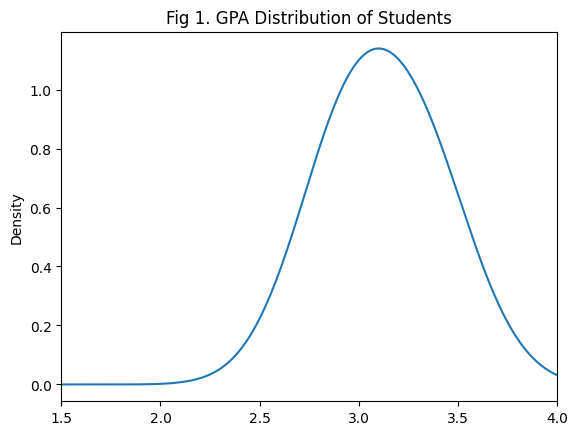

In [100]:
#GPA Distribution in a kernel density estimate

GPAdist = studentData.GPA.plot.kde(title = 'Fig 1. GPA Distribution of Students', xlim = (1.5,4), bw_method = 0.5)

From this exploratory analysis, majority of students GPAs are mainly around **2.3 - 3.8** GPA. 

<u>**Figure 2**:  The distribution of Students Stress Levels. </u>

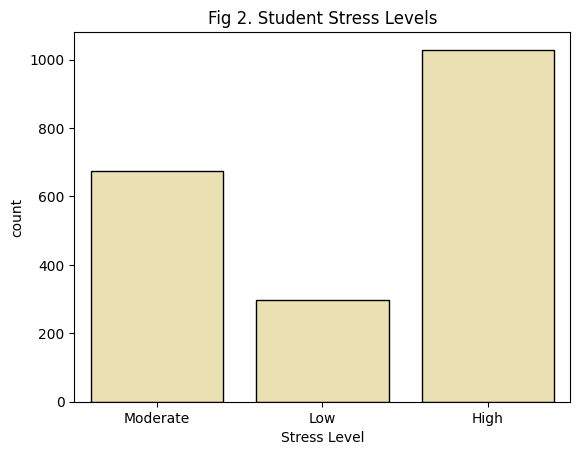

In [101]:
#Distribution of Student Stress Levels

sns.countplot(x = studentData['Stress Level'], edgecolor = 'black',color= '#F3E5AB')
plt.title("Fig 2. Student Stress Levels")
plt.show()

Our exploratory analysis reveals that a majority of students experience **high stress levels** currently in their lives.

#### *GPA: Averages, Maximums and Minimums*

Moving on, I wil explore the **average GPA** of these students, along with the **max GPA** and **minimum GPA**.

In [102]:
#Descriptive statistics of ages

ds = studentData.GPA.describe()

print(f"Mean GPA: {round(ds["mean"],2)}")
print(f"Max GPA: {round(ds["max"],2)}")
print(f"Min GPA: {round(ds["min"],2)}")


Mean GPA: 3.12
Max GPA: 4.0
Min GPA: 2.24


#### *Daily Activity: Hour Averages*

I will also be exploring the **average hours per day** on **daily activities** for all students.

In [103]:
#Descriptive statistics of daily activities

study = studentData.Study.describe()
social = studentData.Social.describe()
extracurricular = studentData.Extracurricular.describe()
sleep = studentData.Sleep.describe()
physicalAct = studentData['Physical Activity'].describe()

print(f"Average Study Hours: {round(study["mean"],2)}")
print(f"Average Social Hours: {round(social["mean"],2)}")
print(f"Average Extracurricular Hours: {round(extracurricular["mean"],2)}")
print(f"Average Sleep Hours: {round(sleep["mean"],2)}")
print(f"Average Physical Activity Hours: {round(physicalAct["mean"],2)}")


Average Study Hours: 7.48
Average Social Hours: 2.7
Average Extracurricular Hours: 1.99
Average Sleep Hours: 7.5
Average Physical Activity Hours: 4.33


<u>**Figure 3**: Distributions of Daily Activity Hours</u>

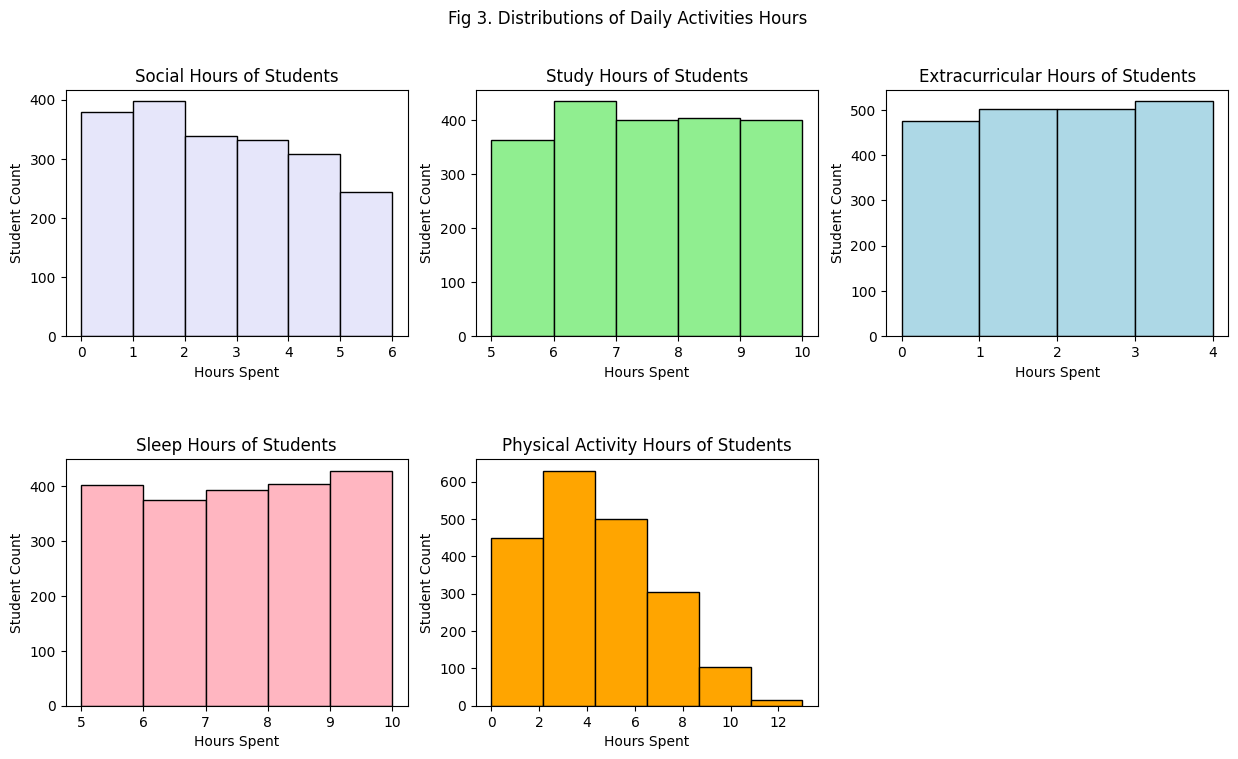

In [104]:
#Create Subplot, set figure size
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 

# Plot histograms on subplots 

#Social Hist
axes[0, 0].hist(studentData["Social"], edgecolor='black', bins=6, color = 'lavender')

axes[0, 0].set_title("Social Hours of Students") #set labels [4]
axes[0, 0].set_xlabel("Hours Spent") 
axes[0, 0].set_ylabel("Student Count")

#Study Hist
axes[0, 1].hist(studentData["Study"], edgecolor='black', bins=5, color = 'lightgreen')

axes[0, 1].set_title("Study Hours of Students") #set labels [4]
axes[0, 1].set_xlabel("Hours Spent")
axes[0, 1].set_ylabel("Student Count")

#Sleep Hist
axes[1, 0].hist(studentData["Sleep"], edgecolor='black', bins=5, color = 'lightpink')

axes[1, 0].set_title("Sleep Hours of Students") #set labels [4]
axes[1, 0].set_xlabel("Hours Spent")
axes[1, 0].set_ylabel("Student Count")

#Physical Act Hist
axes[1, 1].hist(studentData["Physical Activity"], edgecolor='black', bins=6, color = 'orange')

axes[1, 1].set_title("Physical Activity Hours of Students") #set labels [4]
axes[1, 1].set_xlabel("Hours Spent")
axes[1, 1].set_ylabel("Student Count")

#Extracurricular Hist
axes[0, 2].hist(studentData["Extracurricular"], edgecolor='black', bins=4, color = 'lightblue')  

axes[0, 2].set_title("Extracurricular Hours of Students") #set labels [4]
axes[0, 2].set_xlabel("Hours Spent")
axes[0, 2].set_ylabel("Student Count")

# Remove empty plot [5]
axes[1, 2].axis("off")  

#Adjust layout/title

fig.suptitle('Fig 3. Distributions of Daily Activities Hours')
plt.subplots_adjust(hspace=.5, wspace=.2)
plt.show()


### *Relationships*



#### *GPA and Study Hours*

<u>**Figure 4**: Student GPA and number of Study Hours</u>

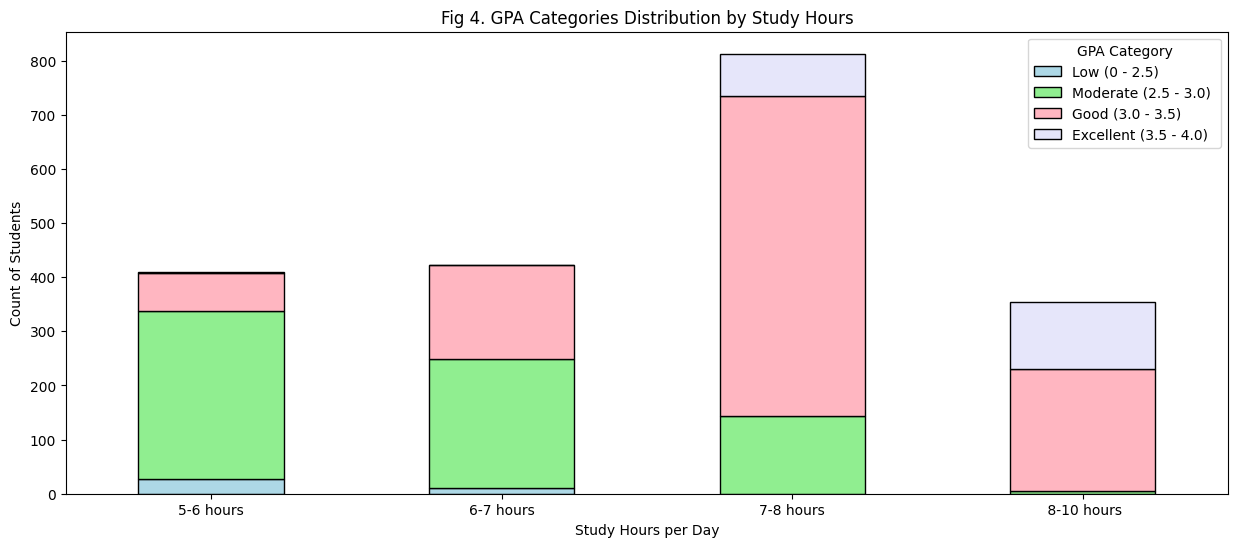

In [105]:
# Groupby Study Hours and GPA Category
groupedData = studentData.groupby(['Study Range', 'GPA Category'], observed=False).size().unstack()

# Create bar plot
groupedData.plot.bar(stacked=True, color=['lightblue', 'lightgreen', 'lightpink','lavender'], 
                     figsize=(15, 6), title="Fig 4. GPA Categories Distribution by Study Hours", edgecolor = 'black')

# Labels 
plt.ylabel("Count of Students")
plt.xlabel("Study Hours per Day")
plt.xticks(rotation=0)

plt.show()

This suggests that students who studied an average of **8-10 hours** resulted in **good and excellent** GPAs. On the other hand, students who study **6 hours or less** had majority of **good and moderate** GPAs.

<u>**Table 1: Summary of Student GPA and Student Stress Levels**</u>

In [106]:
#Groupby activies based on different stress levels
groupedGPA = studentData.groupby('Stress Level')[['GPA']].mean()

# Convert to DF
groupedGPA.unstack()
groupedGPA

,GPA
Stress Level,
High,3.26
Low,2.82
Moderate,3.02


This suggest that students under higher stress levels have higher GPAs than students moderately to low stressed students on average.

<u>**Table 2: Summary of Student GPA and Average hours of Daily Activities per Day**</u>

In [107]:
#Groupby activies based on GPA catgories
groupedGPA = studentData.groupby('GPA Category', observed= False)[['Sleep', 'Social', 'Physical Activity', 'Extracurricular','Study']].mean()

# Convert to DF
groupedGPA.unstack()
groupedGPA

,Sleep,Social,Physical Activity,Extracurricular,Study
GPA Category,,,,,
Low (0 - 2.5),7.52,2.56,6.01,2.19,5.73
Moderate (2.5 - 3.0),7.54,2.95,5.16,2.02,6.34
Good (3.0 - 3.5),7.44,2.63,3.99,1.99,7.96
Excellent (3.5 - 4.0),7.69,2.30,2.98,1.86,9.18


This table suggest that students with higher GPAs have more study time allocated while students with lower GPAs spend less time studying, and more time exercising/socializing on average.

#### *Stress Level and Average Hours of Activities*

<u>**Table 3: Summary of Student Stress levels and Average hours of Daily Activities per Day**</u> 

In [108]:
#Groupby activies based on different stress levels
groupedStress = studentData.groupby('Stress Level')[['Sleep', 'Social', 'Physical Activity', 'Extracurricular','Study']].mean()

# Convert to DF
groupedStress.unstack()
groupedStress

,Sleep,Social,Physical Activity,Extracurricular,Study
Stress Level,,,,,
High,7.05,2.63,3.96,1.98,8.39
Low,8.06,2.89,5.58,1.99,5.47
Moderate,7.95,2.74,4.34,2.01,6.97


An examination of this table reveals that students with higher stress levels sleep less than students with different stress levels. In addition, moderate and low stress level students have less study hours compared to students with high stress level. This table can help us figure out **how many hours of each activity are allocated** for each type of student stress level.

**Below is a deeper dive of exploratory analyses for each activity and stress levels of students.**

<u>**Figure 5**: Breakdown of Stress Levels and Sleep Hours</u>

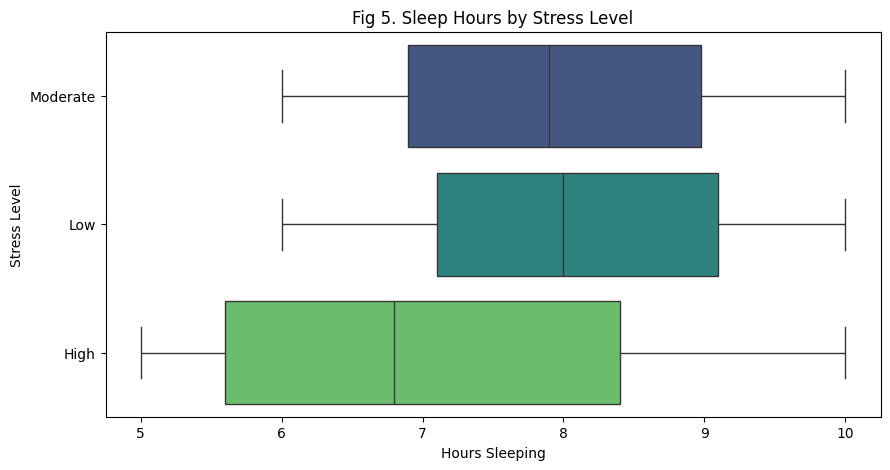

In [109]:
# Boxplot for Sleep and Stress level for a clearer visualization 
plt.figure(figsize=(10, 5)) 
sns.boxplot(y='Stress Level', x='Sleep', data=studentData, hue='Stress Level', palette='viridis') #Color Palettes found on Seaborn [6]

#Labels
plt.title('Fig 5. Sleep Hours by Stress Level')
plt.xlabel('Hours Sleeping')
plt.ylabel('Stress Level')
plt.show()

We can see that **students under low stress levels have more sleep hours** than students with moderate and high stress levels.

<u>**Figure 6**: Breakdown of Stress Levels and Extracurricular</u>

Since extracurricular hours were nearly the same for all types of students, we will **not be exploring extracurricular activities**.

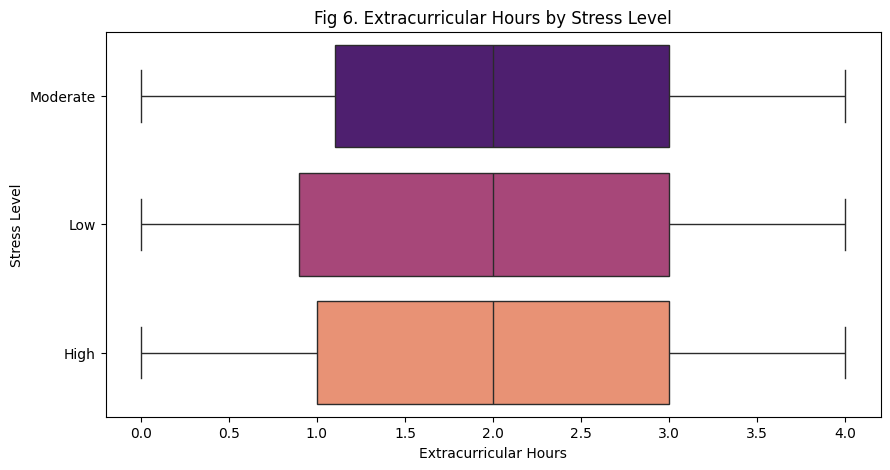

In [110]:
# Boxplot for Extracurricular and Stress level for a clearer visualization
plt.figure(figsize=(10, 5))  # Setting figure size
sns.boxplot(y='Stress Level', x='Extracurricular', data=studentData, hue='Stress Level', palette='magma') #Color Palettes found on Seaborn [6]

#Labels
plt.title('Fig 6. Extracurricular Hours by Stress Level')
plt.xlabel('Extracurricular Hours')
plt.ylabel('Stress Level')
plt.show()

This suggest that **extracurricular hours per day** were **about the same for all students**.

<u>**Figure 7** : Relationship of Physical Activity and Stress Levels.</u>

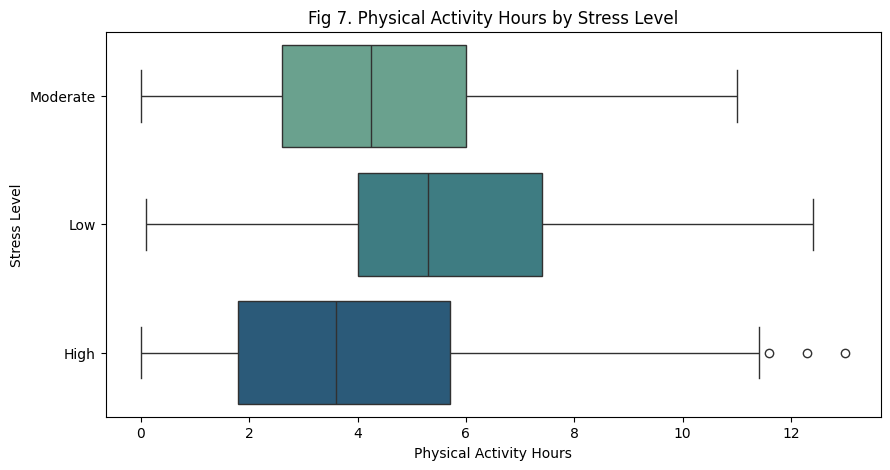

In [111]:
# Boxplot for Physical Activity and Stress level for a clearer visualization
plt.figure(figsize=(10, 5)) 
sns.boxplot(y='Stress Level', x='Physical Activity', data=studentData, hue='Stress Level', palette='crest') #Color Palettes found on Seaborn [6]

#Labels
plt.title('Fig 7. Physical Activity Hours by Stress Level')
plt.xlabel('Physical Activity Hours')
plt.ylabel('Stress Level')
plt.show()

The boxplot shows that students with higher stress levels engage in less physical activity on average, while those with low stress levels are the most physically active on average. 

<u>**Figure 8**: Breakdown of Social Hours and Stress Level</u>

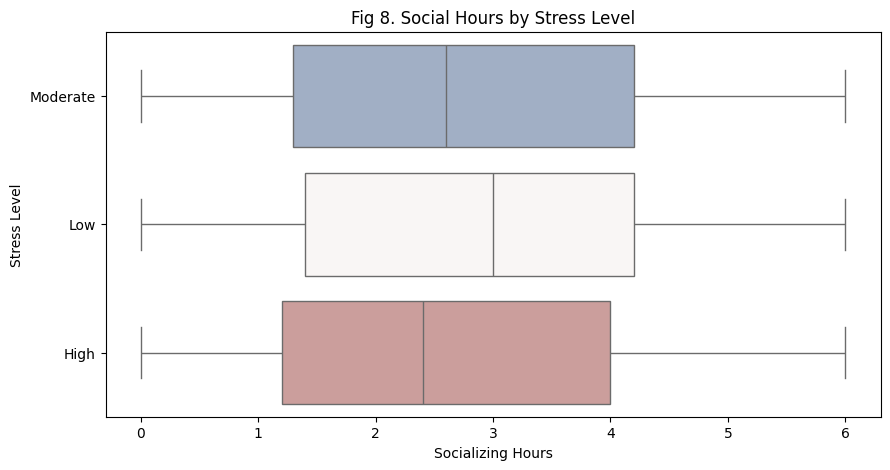

In [112]:
# Boxplot for Social and Stress level for a clearer visualization 
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='Social', y='Stress Level' , data=studentData, hue='Stress Level', palette='vlag') #Color Palettes found on Seaborn [6]

#Labels
plt.title('Fig 8. Social Hours by Stress Level')
plt.xlabel('Socializing Hours')
plt.ylabel('Stress Level')
plt.show()

From our data, we can see that **longer socializing hours** are found within students **under lower stress levels.**

<u>**Figure 9**: Relationship of student stress levels and study hours</u>

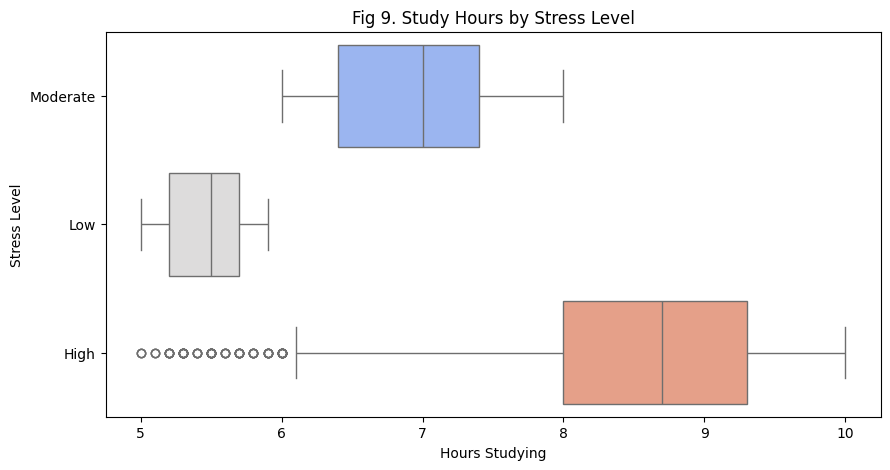

In [113]:
# Boxplot for Study and Stress level for a clearer visualization
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='Study',  y='Stress Level', data=studentData, hue='Stress Level', palette='coolwarm') #Color Palettes found on Seaborn [6]

#Labels
plt.title('Fig 9. Study Hours by Stress Level')
plt.xlabel('Hours Studying')
plt.ylabel('Stress Level')
plt.show()

This suggests that **students under high stress levels** allocate more time to study. In addition, the outliers in the boxplot tells us that students with high stress levels also have different study behaviors, with some studying significantly less than their peers. 

#### *GPA and Stress Levels*

<u>**Figure 10:** Stress Levels and GPA Categories</u>

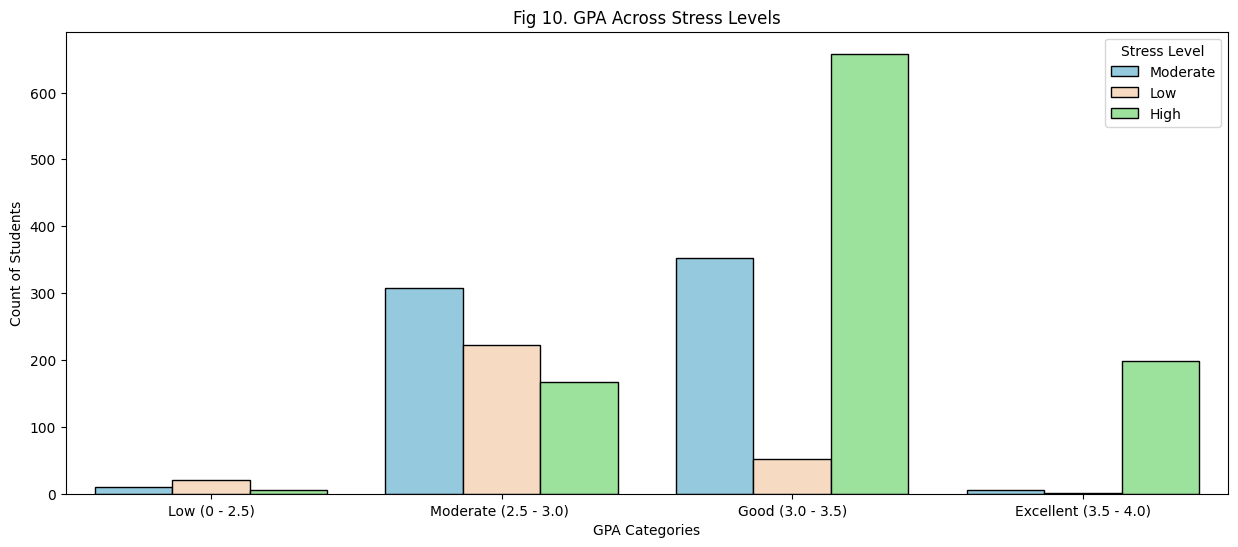

In [114]:
# Create countplot
plt.figure(figsize=(15, 6))
sns.countplot(data=studentData, x='GPA Category', hue='Stress Level', edgecolor = 'black',
              palette=['skyblue', 'peachpuff', 'lightgreen']).set(title = "Fig 10. GPA Across Stress Levels")

# Labels
plt.ylabel("Count of Students")
plt.xlabel("GPA Categories")
plt.xticks(rotation=0)
plt.show()

As seen above, students with **moderate to higher stress levels** tend to have **high and good GPAs**, while students with **low stress levels have low and moderate GPAs**.

## <u>Discussion</u>

In this examination, I explored how student stress levels relate to their daily activities and GPA. Extracurricular activity hours are similar across all stress levels, with **8% of daily hours** devoted to extracurriculars. Therefore, hours spent doing extracurricular activities do not show much significance to its impact on student stress levels.

<u>*Activities like studying, sleeping, exercising, and socializing are predictors of stress levels:* </u>
- **Students with low/minimal stress spend less time studying (20%) compared to sleeping (30–35%) and exercising (25%)**. 
- **Students under moderate stress spend their time similarly to low-stress students but study more (30%) and exercise less (16.5%)**.
- **Students under high amounts of stress spend more time studying (35%) compared to sleeping (30%) and exercising (16%)**. 
- **Low-stress and moderate-stress students spend more time socializing (12.5%) than high-stress students (10%).**


In our analyses portion, there are some outliers in my boxplots **(Figures 7 and 9)** concerning students under high-stress levels. These outliers are seen in the correlation between study hours by stress levels and physical activity by stress level. This can suggest that students who do not study a lot and are highly stressed may avoid homework or feel overwhelmed as a response to the stress.Also, since some highly stressed students exercise a lot as seen in the outliers, this might suggest that students use exercising as a means to deal with stress, since exercising is a common activity for students with low and moderate stress level. As a result, these outlier data showcase how different students deal with stress.

<u>*Stress levels also seem to affect GPA:*</u>

- **Majority of high-stress students achieved GPAs between 3.0 and 4.0. on average.**.
- **Majority of moderate-stress students achieved GPAs between 2.5 and 3.5. on average.**
- **Majority of low-stress students achieved average GPAs between 2.5 and 3.0. on average**

My exploratory analysis also had outliers for all stress levels **(Figure 10)**, with GPAs in the low range (0–2.5). This could be due to how different people respond to stress (i.e., avoiding studying and feeling overwhelmed), which results in poor academic performance. 

Although most students under high stress perform well academically, the drawbacks affect their health. I discovered that students with high stress levels tend to study more than sleep, socialize, and exercise, **all essential health factors**. However, moderate and low stress students could balance their studying with self-care and still had moderate to good GPAs. This analysis emphasizes that maintaining health is essential for academic and personal success. Many high-stress students perform well academically, but neglect other activities beneficial for their mental health (socializing, sleeping, exercising). On the other hand, students with moderate stress levels were shown to balance their daily activities evenly and still resulted in good academic performance. These results highlight the importance of balancing academics with self-care to achieve success both in school and in life. These results can inform students on how to balance school with their personal and academic lives.

## <u>References</u>

1. Student Image - <a href="https://storyset.com/education"> Education illustrations by Storyset </a>
2. Data Set, Kaggle - <a href="https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset"> Kaggle </a>
3. Pandas cut() documentation - <a href="https://pandas.pydata.org/docs/reference/api/pandas.cut.html"> Pandas </a>
4. Subplot Functions - <a href=https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html > Matplotlib </a>
5. How to turn off Subplots -  <a href="https://stackoverflow.com/questions/25862026/turn-off-axes-in-subplots"> StackOverflow </a>
6. Color Palettes - <a href="https://seaborn.pydata.org/tutorial/color_palettes.html"> Seaborn </a>

## <u>LLM Prompts</u>


- How can I create outlines for the bars in my histogram ?
- What is a good hook to catch the readers attention in the intro?